In [1]:
from matplotlib import pylab as plt

In [30]:
from math import sqrt, pi, exp

class Gaussian(object):
    def __init__(self, mu = 0, sigma = 1):
        self.sigma = sigma
        self.mu = mu
    
    def value(self, digit, threshold = 0.00001):
        res = exp(-1.0 * (digit - self.mu) ** 2 / (2 * (self.sigma ** 2))) / (sqrt(2 * pi) * self.sigma)
        return res if res > threshold else threshold
    def updateParameter(self, mu = None, sigma = None):
        if sigma is not None:
            self.sigma = sigma
        if mu is not None:
            self.mu = mu
        return self
def differ(arr1, arr2, threshold = 0.01):
    return sqrt(sum([(a1 - a2) ** 2 for a1, a2 in zip(arr1, arr2)]))
            
class GMM(object):
    def __init__(self, data, K = 10):
        # init parameters
        self.K = K
        self.data = data
        
        self.alpha = [1.0 / K] * K # each model gets an alpha
        
        # init mu
        self.gaussian = []
        interval = len(self.data) / K
        for i in range(K):
            ind = data[i * interval: (i + 1) * interval]
            mu = reduce(lambda x, y: x + y, ind) / interval
            self.gaussian.append(Gaussian(mu = mu))
        self.train()
    
        
    def value(self, digit):
        return sum(self.probability(digit))
    
    def probability(self, digit):
        return [a * g.value(digit) for a, g in zip(self.alpha, self.gaussian)]
        
    def train(self, threshold  = 0.1):
        """
        gamma: size[len(self.data), K]
        """
        old_mu =  [float('Inf')] * len(self.gaussian) 
        new_mu = [g.mu for g in self.gaussian]
        
        print 'origin mu:', [g.mu for g in self.gaussian]
        while differ(old_mu, new_mu, threshold) > threshold:
#             print [g.mu for g in self.gaussian]
            gamma = []
            for d in self.data:
                dprob = self.probability(d)
                dsum = sum(dprob)
                gamma.append([prob * 1.0 / dsum for prob in dprob])
            assert len(self.data) == len(gamma)
            
            N = len(self.data)
            
            # update mu
            nex_mu = []
            
            for i in range(self.K):
                sum_rev_gamma_mult_data = 0
                sum_gamma_k = 0
                for j in range(len(gamma)):
                    sum_rev_gamma_mult_data += gamma[j][i] * self.data[j]
                    sum_gamma_k += gamma[j][i]
                nex_mu.append(sum_rev_gamma_mult_data / sum_gamma_k)
            
            old_mu, new_mu = new_mu, nex_mu
            self.gaussian = [gaussian.updateParameter(mu = mu) for gaussian, mu in zip(self.gaussian, new_mu)]
            
            # update sigma
            nex_sigma = []
            for i in range(self.K):
                sum_gamma = 0
                sum_gamma_square = 0
                for j in range(len(self.data)):
                    sum_gamma += gamma[j][i]
                    sum_gamma_square = gamma[j][i] * ((self.data[j] - new_mu[i]) ** 2)
                #print 'sigma', sum_gamma_square
                nex_sigma.append(sqrt(1.0 * sum_gamma_square / sum_gamma))
            self.gaussian = [gaussian.updateParameter(sigma = sigma) for gaussian, sigma in zip(self.gaussian, nex_sigma)]
            
            # update gamma
            nex_alpha = []
            for i in range(self.K):
                sum_comp_gamm = 0
                for j in range(len(gamma)):
                    sum_comp_gamm += gamma[j][i]
                
                nex_alpha.append(sum_comp_gamm)
            nex_N = sum(nex_alpha)
            self.alpha = [1.0 * a / nex_N for a in nex_alpha]
            
               
                
dat = [1,2,3,3,3,3,3,3,4,5,6,8,9,10,13,16,20,20,20,20,20,22,100,100,100,100,100,100,100,100,100,100,100,100]
a = GMM(dat) 
print [a.value(d) for d in dat]
plt.plot([d for d in range(len(dat))], [a.value(d) for d in dat])        

origin mu: [2, 3, 3, 6, 10, 18, 20, 74, 100, 100]


KeyboardInterrupt: 

[0.00999999999999801, 0.009999999999998484, 0.01, 0.05000000000000426, 0.05500000000000114, 0.09999999999999948, 0.09999999999999953, 0.09999999999999964, 0.09999999999999981, 0.09999999999999984, 0.09999999999999999, 0.1, 0.10000000000000023, 0.10000000000000024, 0.10000000000000041, 0.10000000000000045, 0.10000000000000046, 0.10000000000000049, 0.10000000000000142, 0.1999999999999993, 0.29999999999999716, 0.3, 0.30000000000000004, 0.4, 0.44, 0.5, 0.6, 0.6999999999999981, 0.7, 0.7900000000000009, 0.7999999999999972, 0.8000000000000007, 0.8500000000000014, 0.89, 0.8999999999999986, 0.8999999999999998, 0.9, 0.9000000000000004, 0.9212598425196851, 0.9333333333333336, 0.9400000000000006, 0.9500000000000001, 0.9500000000000011, 0.9599999999999994, 0.9666666666666662, 0.9699999999999999, 0.97, 0.9700000000000001, 0.9749999999999996, 0.9799999999999998, 0.98, 0.99, 0.9900000000000001, 1.0, 1.0000000000000013, 1.0999999999999996, 1.1, 1.1500000000000004, 1.1999999999999993, 1.2333333333333332

[28.587406673262613, 35.13854249329646, 36.577713584895044, 41.01055396890595, 43.06106751221054, 48.316361660404155, 48.769129293436045, 51.179901419015984, 54.116235834449974, 55.39380701212748, 58.13827220175454, 62.7077081769407, 64.03462152289997, 67.64759328006826, 72.26396651655004, 75.44794812287716, 79.96398468505876, 93.66456921651009, 110.5060818961581, 308.91424556322306]
[58.87176626964773, 58.87176626957055, 58.87176626963063, 58.87176626968688, 58.871766269616884, 58.871766269584306, 58.8717662696439, 58.87176626964412, 58.87176626964483, 58.871766269594936, 58.87176626959785, 58.87176626960684, 58.871766269643146, 58.8717662696816, 58.871766269656185, 58.871766269634136, 58.87176626960038, 58.871766269671255, 58.87176626957173, 58.871766269606404]


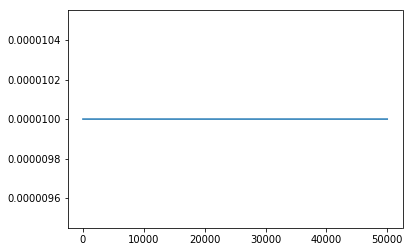

In [20]:
data = None
with open('data', 'r') as inf:
    data = [float(d) for d in inf.read().strip().split()]
print data
model = GMM(data, K = 20)
# print [g.mu for g in model.gaussian]
# print [g.sigma for g in model.gaussian]
# plt.plot([d for d in range(len(data))], [model.value(d) for d in data])
plt.plot([d for d in data], [model.value(d) for d in data])

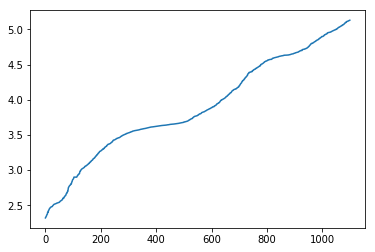

In [4]:
plt.plot([d for d in range(len(data))], [d for d in data]) #

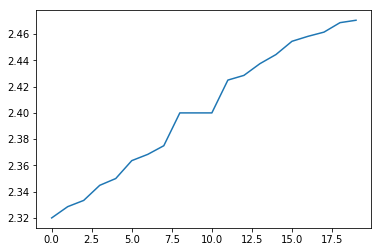

In [5]:
b = data[:20]
plt.plot([d for d in range(len(b))], [d for d in b])

[0.0021934371738197346, 0.002195311310026576, 0.002197118987616901, 0.002197118987616901, 0.002197118987616901, 0.002197118987616901, 0.002197118987616901, 0.002197118987616901, 0.0021988600398317915, 0.0022005343059714358, 0.002202141631419851, 0.0022051548723400582, 0.0022065605092085497, 0.002207898648222144, 0.0022115068706293228, 0.0022145035271441257, 0.0022175434961861544, 0.0022175434961861544, 0.0022175434961861544, 0.0022175434961861544, 0.0022175434961861544, 0.002218652651464447, 0.002053931042499124, 0.002053931042499124, 0.002053931042499124, 0.002053931042499124, 0.002053931042499124, 0.002053931042499124]


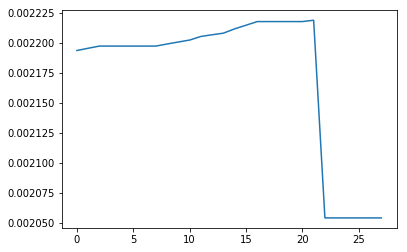

In [24]:
dat = [1,2,3,3,3,3,3,3,4,5,6,8,9,10,13,16,20,20,20,20,20,22,100,100,100,100,100,100]
a = GMM(dat) 
print [a.value(d) for d in dat]
plt.plot([d for d in range(len(dat))], [a.value(d) for d in dat])

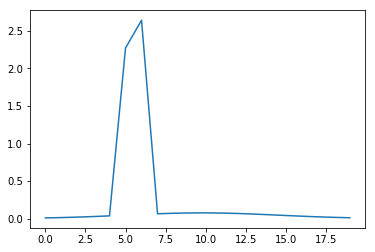

In [8]:
print [a.value(d) for d in range(20)], sum([a.value(d) for d in range(20)])

[0.009639786298043707, 0.014997514672280884, 0.02221484037872112, 0.03132846461035856, 0.04206365793367326, 0.05377085912882344, 0.06544235603626332, 0.07583032011787513, 0.08365634089723904, 0.08786721318518943, 0.08786721318518943, 0.08365634089723904, 0.07583032011787509, 0.06544235603626326, 0.05377085912882342, 0.04206365793367322, 0.03132846461035853, 0.022214840378721096, 0.014997514672280863, 0.009639786298043691] 0.973622706517


In [9]:
print a.alpha

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [10]:
exp(622)

1.3525948945519025e+270

In [11]:
exp(1)

2.718281828459045

In [12]:
a = GMM([i for i in range(100)])


In [28]:
sqrt(4)

2.0